In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [4]:
df = kid_readout.analysis.archive.load_archive('/data/detectors/archive/2015-01-14_145435_continous_cooling.npy')

In [5]:
df.shape

(672, 88)

In [6]:
df2 = kid_readout.analysis.archive.load_archive('/data/detectors/archive/2015-02-13_120307_led.npy')

In [7]:
df2.shape

(334, 91)

(0.001, 0.1)

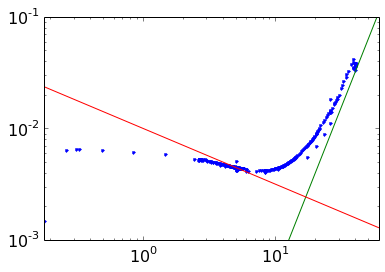

In [101]:
dd = pd.concat((df[df.resonator_id==0],df2[(df2.resonator_id==0) & (df2.timestream_modulation_duty_cycle==1)]))
#plot(dd.sweep_primary_load_temperature,dd.f_0,'.')
loglog(dd.sweep_primary_package_temperature,1-dd.f_0/dd.f_0.max(),'.')
xlim(0,60)
#ylim(1e-3,1e-1)
#loglog(dd.sweep_primary_package_temperature,.7e-2*nap.exp(dd.sweep_primary_package_temperature/10)/(dd.sweep_primary_package_temperature**.5))
x = np.linspace(.1,60,10000)
loglog(x,5e-7*x**3)
loglog(x,.1e-1*x**-.5)
ylim(1e-3,1e-1)

In [102]:
dd.sweep_primary_package_temperature.min()

0.17800589031402572

In [132]:
res0 = pd.concat((df[df.resonator_id==0],df2[(df2.resonator_id==0) & (df2.timestream_modulation_duty_cycle==1)]))
res1 = pd.concat((df[df.resonator_id==1],df2[(df2.resonator_id==1) & (df2.timestream_modulation_duty_cycle==1)]))
res0 = res0[(res0.Q>2000)]
res1 = res1[(res1.Q>2000)]
load = res1.sweep_primary_load_temperature[:]
pack = res1.sweep_primary_package_temperature[:]
pack[pack>3] = load[pack>3]
res1['temp'] = pack

In [103]:
res1.sweep_primary_package_temperature.min()

2.6858303253687019

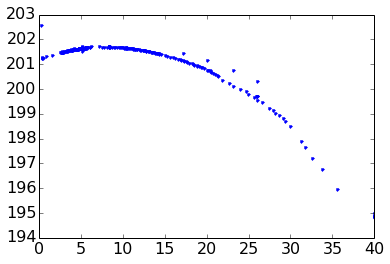

In [105]:
plot(res0.sweep_primary_package_temperature,res0.f_0,'.')

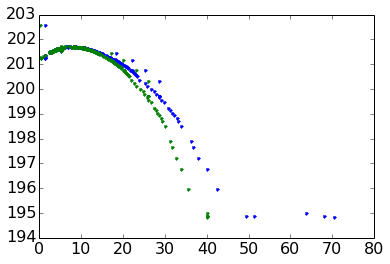

In [106]:
plot(res0.sweep_primary_load_temperature,res0.f_0,'.')
plot(res0.sweep_primary_package_temperature,res0.f_0,'.')
#xlim(35,45)

In [107]:
res1.f_0.max()

157.50417903847909

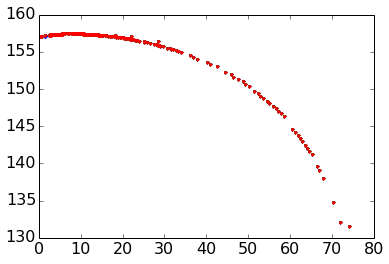

In [133]:
plot(res1.sweep_primary_load_temperature,res1.f_0,'.')
plot(res1.sweep_primary_package_temperature,res1.f_0,'.')
plot(res1.temp,res1.f_0,'.')
#xlim(35,45)

(0, 10000.0)

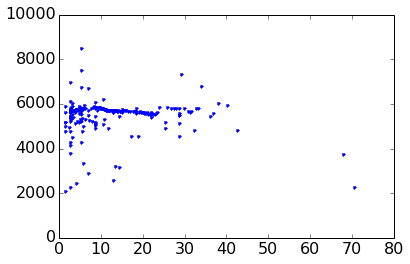

In [109]:
plot(res0.sweep_primary_load_temperature,res0.Q,'.')
ylim(0,1e4)

(100.0, 25000.0)

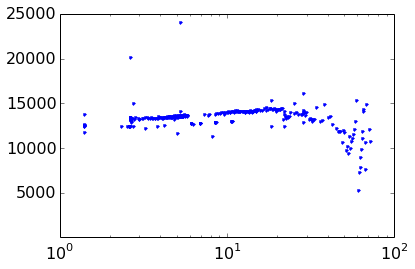

In [129]:
semilogx(res1.sweep_primary_load_temperature,res1.Q,'.')
ylim(1e2,25e3)

(100.0, 25000.0)

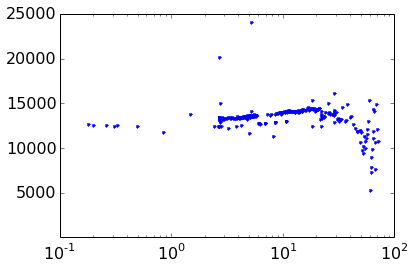

In [135]:
semilogx(res1.temp,res1.Q,'.')
ylim(1e2,25e3)

In [81]:
res1.a.isnull().sum()

258

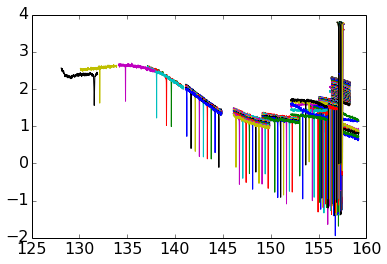

In [115]:
for k,row in res1.iterrows():
    plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21))+row.atten)

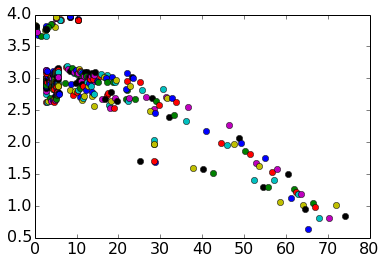

In [116]:
for k,row in res1.iterrows():
    s21db=20*np.log10(np.abs(row.sweep_s21))
    temp = row.sweep_primary_package_temperature
    if temp > 20:
        temp = row.sweep_primary_load_temperature
    plot(temp,s21db[-1]-s21db.min(),'o')

(155, 158)

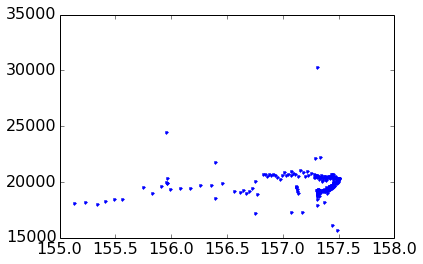

In [122]:
plot(res1.f_0,res1.Q_i,'.')
ylim(15e3,35e3)
xlim(155,158)

157.168036564 11765.6143915 277.965838066 nan
157.503412187 12929.5211535 11.444277148 nan
157.497804388 12833.4867254 12.4229022684 nan
157.503407203 12904.8282187 12.4942427092 nan
157.482757049 12794.9561427 12.9488813436 nan
157.317093362 12504.0950059 20.2661641025 nan
157.503813179 12897.5006002 13.1036857333 nan
157.217144688 13865.6604988 418.245294302 nan
157.309335107 13289.5648024 20.4008935594 nan
157.316671614 12526.6900871 21.7076126043 nan
157.316735817 12513.404094 21.9868734551 nan
157.120175138 12666.1081648 14.5362752741 nan
157.126374111 12444.522265 88.6807803192 nan
157.308993683 13308.3256875 21.8809699586 nan
157.469763783 13094.6599271 26.7710308191 nan
157.503373911 12932.8420638 13.0437806342 nan
157.316097997 12490.1314821 27.9205933443 nan
157.41687112 12592.3384006 197.637983165 nan
157.446718865 13285.9287458 317.569876106 nan
157.320129996 12477.5451482 25.5314855741 nan
157.46978106 13067.3818497 18.0167574781 nan
157.470752608 13075.5032588 13.30209991

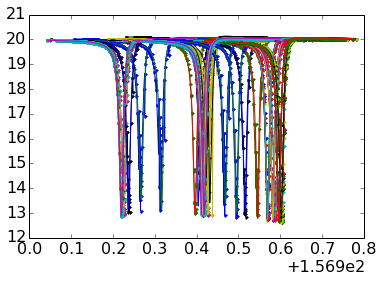

In [123]:
#dd = res1[(res1.f_0<140) & (res1.f_0>135)]
dd = res1[res1.atten<63]
for k,row in dd.iterrows():
    print row.f_0,row.Q,row.Q_err,row.a
    plot(row.sweep_freqs_MHz,20*(np.abs(row.sweep_normalized_s21)),'.-')
    plot(row.sweep_model_freqs_MHz,20*(np.abs(row.sweep_model_normalized_s21)))

In [83]:
1380/15000.

0.092

In [91]:
pd.DataFrame.to_csv?

(0, 10)

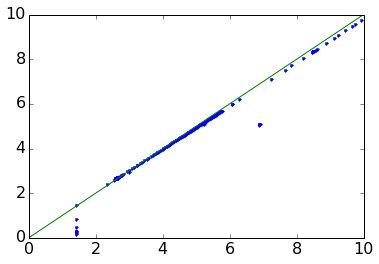

In [125]:
plot(res1.sweep_primary_load_temperature,res1.sweep_primary_package_temperature,'.')
plot(np.arange(0,40),np.arange(40))
xlim(0,10)
ylim(0,10)

In [113]:
res1[['sweep_primary_package_temperature','sweep_primary_load_temperature','f_0','Q','Q_i']].to_csv('/data/detectors/archive/2015-11-21-ybco-157.5-MHz-resonator-summary.csv',index=False)

In [114]:
!ls -lhtr /data/detectors/archive/2015-11-21-ybco-157.5-MHz-resonator-summary.csv

-rwxrwxr-x. 1 readout readout 33K Nov 21 21:48 /data/detectors/archive/2015-11-21-ybco-157.5-MHz-resonator-summary.csv
